In [288]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Reading the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
# Combining the data into a single dataset
combine_data=pd.merge(city_data,ride_data,on='city')
combine_data=combine_data.set_index('type')
del combine_data['date']
# Displaying the data table for preview
combine_data.head()

,city,driver_count,fare,ride_id
type,,,,
Urban,Richardfort,38,13.93,5628545007794
Urban,Richardfort,38,14.00,910050116494
Urban,Richardfort,38,17.92,820639054416
Urban,Richardfort,38,10.26,9554935945413
Urban,Richardfort,38,23.00,720020655850


Bubble plot of Ride Sharing Data

In [289]:
#x_axis for each scatter plot
ridespertype1=combine_data.loc["Urban","city"].value_counts()
ridespertype2=combine_data.loc["Suburban","city"].value_counts()
ridespertype3=combine_data.loc["Rural","city"].value_counts()

citytypes=combine_data.groupby(['type','city'])
totaldata=citytypes['fare'].mean()
drivercount=citytypes['driver_count'].count()
type1="Urban"
type2="Suburban"
type3="Rural"

#y_axis for each scatter plot
urbandata=totaldata.loc[type1]
suburbandata=totaldata.loc[type2]
ruraldata=totaldata.loc[type3]
urban_drivercount=drivercount.loc[type1]
suburban_drivercount=drivercount.loc[type2]
rural_drivercount=drivercount.loc[type3]

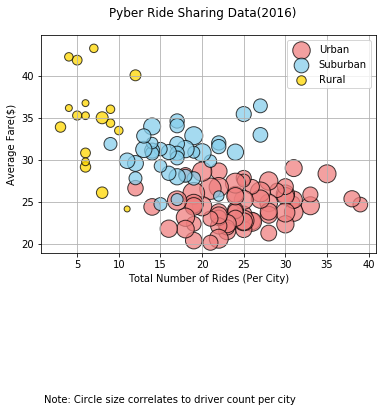

In [290]:
plt.suptitle("Pyber Ride Sharing Data(2016)")


plt.scatter(ridespertype1,urbandata ,s=urban_drivercount*12,marker="o",
            color="lightcoral",edgecolor="black",alpha=0.75,label="Urban")

plt.scatter(ridespertype2,suburbandata,s=suburban_drivercount*12, marker="o", 
            color="skyblue",edgecolor="black",alpha=0.75,label="Suburban")

plt.scatter(ridespertype3, ruraldata, s=rural_drivercount*12, marker="o", 
            color="gold",edgecolor="black",alpha=0.75,label="Rural")

plt.text(1,1,"Note: Circle size correlates to driver count per city")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()
plt.legend(loc="upper right")
plt.show()

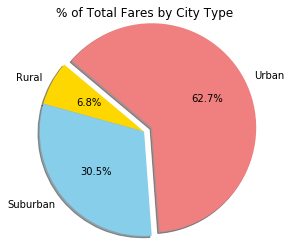

<Figure size 432x288 with 0 Axes>

In [129]:
#total fares by city type
by_type=combine_data.groupby('type')
totalfares=by_type['fare'].sum()
key_list1=totalfares.keys()
colors=["gold","skyblue","lightcoral"]
explode=(0,0,0.1)
totalfares_plot=totalfares.plot(kind='pie',y=key_list,colors=colors,
                                explode=explode,autopct="%1.1f%%",radius=1.2,shadow=True, startangle=140,
                                title="% of Total Fares by City Type")
plt.ylabel('')
plt.show()
plt.tight_layout()

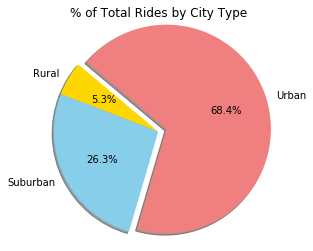

<Figure size 432x288 with 0 Axes>

In [130]:
#total rides byt city type
totalrides=by_type['ride_id'].count()
key_list2=totalrides.keys()
totalrides_plot=totalrides.plot(kind='pie',y=key_list,colors=colors,
                                explode=explode,autopct="%1.1f%%", radius=1.2,shadow=True, startangle=140,
                                title="% of Total Rides by City Type")
plt.ylabel('')
plt.show()
plt.tight_layout()

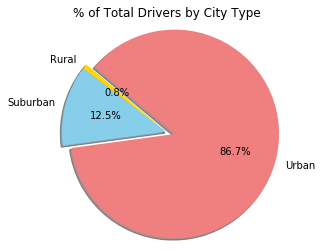

<Figure size 432x288 with 0 Axes>

In [131]:
#total drivers by city type
totaldrivers=by_type['driver_count'].sum()
key_list3=totaldrivers.keys()
totaldrivers_plot=totaldrivers.plot(kind='pie',y=key_list,colors=colors,
                                explode=explode,autopct="%1.1f%%",radius=1.2,shadow=True, startangle=140,
                                title="% of Total Drivers by City Type")
plt.ylabel('')
plt.show()
plt.tight_layout()


The three trends from the data visualised above are,

1) Ride sharing is observed more in Urban areas than Suburban/Rural.
2) This is due to a high concentration of people in such areas who demand such ride-sharing services. Also, it also shows the     density of drivers is also spread out as per the demand. And therefore service depends on demand and drivers by the city       type.
3) Revenue generation wise it also shows that the target market is concentrated more in the Urban areas. As the demand is high,   supply can be more and thus the fares on average are more than in suburban and rural areas.
